In [95]:
# Importing required libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

# Loading data
auto_df = pd.read_csv("/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/Auto.csv")

# Fitting the OLS on data
model = sm.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto_df).fit()

# Print regression coefficients
print(model.params)


Intercept           -19.832038
horsepower[T.102]    -1.385212
horsepower[T.103]    -3.801417
horsepower[T.105]     1.058113
horsepower[T.107]    -0.135448
                       ...    
displacement          0.002486
weight               -0.004043
acceleration         -0.235620
year                  0.716351
origin                1.373317
Length: 100, dtype: float64


In [98]:
auto_df['horsepower'].replace('?', np.nan, inplace=True)

print(auto_df['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' nan '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [99]:
# Convert 'horsepower' column to numeric, coerce errors to NaN
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

# Fill missing values with the mean
auto_df['horsepower'].fillna(auto_df['horsepower'].mean(), inplace=True)



# Collinearity

In [101]:
auto_df = auto_df.drop(columns=['name'])
auto_df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


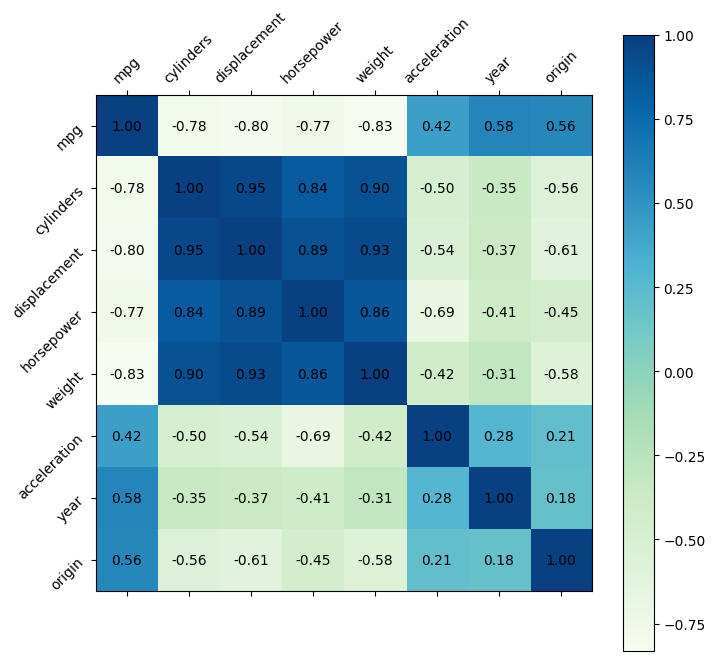

In [53]:
import matplotlib.pyplot as plt

correlation_matrix = auto_df.corr()

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(correlation_matrix, cmap=plt.cm.GnBu)

plt.colorbar(cax)

tick_marks = [i for i in range(len(auto_df.columns))]
plt.xticks(tick_marks, auto_df.columns, rotation=45)
plt.yticks(tick_marks, auto_df.columns, rotation=45)

for i in range(len(auto_df.columns)):
    for j in range(len(auto_df.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()


> Here the dark squares represent a strong correlation (close to 1) while the lighter ones represent the weaker correlation(close to 0). That’s the reason, all the diagonals are dark blue, as a variable is fully correlated with itself.

# Hypothesis Test for Predictors
One of the fundamental questions that should be answered while running Multiple Linear Regression is, whether or not, at least one of the predictors is useful in predicting the output.

In [54]:
print(model.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.871    
Dependent Variable:   mpg              AIC:                2033.1108
Date:                 2023-09-26 20:30 BIC:                2431.5045
No. Observations:     397              Log-Likelihood:     -916.56  
Df Model:             99               F-statistic:        27.92    
Df Residuals:         297              Prob (F-statistic): 9.67e-107
R-squared:            0.903            Scale:              7.9227   
--------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
Intercept         -19.8320   4.2540 -4.6619 0.0000 -28.2039 -11.4601
horsepower[T.102]  -1.3852   2.9419 -0.4709 0.6381  -7.1749   4.4045
horsepower[T.103]  -3.8014   2.9424 -1.2919 0.1974  -9.5920   1.9892
horsepower[T.105]   1.0581   1.0694  0.9894 0.3233  -

>If the value of F-statistic is equal to or very close to 1, then the results are in favor of the Null Hypothesis and we fail to reject it.
But as we can see that the F-statistic is many folds larger than 1, thus providing strong evidence against the Null Hypothesis (that all coefficients are zero). Hence, we reject the Null Hypothesis and are confident that at least one predictor is useful in predicting the output.

# Feature Selection
Two of the most popular approaches to do feature selection are:

>### Forward Selection: 
>We start with a model without any predictor and just the intercept term. We then perform simple linear regression for each predictor to find the best performer(lowest RSS). We then add another variable to it and check for the best 2-variable combination again by calculating the lowest RSS(Residual Sum of Squares). After that the best 3-variable combination is checked, and so on. The approach is stopped when some stopping rule is satisfied.
>### Backward Selection: 
>We start with all variables in the model, and remove the variable that is the least statistically significant (greater p-value: check the model summary above to find p-values of variables). This is repeated until a stopping rule is reached. For instance, we may stop when there is no further improvement in the model score.

In [58]:
# Defining a function to evaluate a model
def evaluateModel(model):
    print("RSS = ", ((auto_df.mpg - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

# Let’s first evaluate models with single predictors one by one, starting with Cylinders.

In [60]:
# For Cylinders
model_cylinders = sm.ols('mpg ~ cylinders', auto_df).fit()
evaluateModel(model_cylinders)

RSS =  9638.365010589077
R2 =  0.6025795068354939


In [61]:
# For Displacement
model_displacement = sm.ols('mpg ~ displacement', auto_df).fit()
evaluateModel(model_displacement)

RSS =  8557.946288316416
R2 =  0.6471286125145206


In [62]:
# For Horsepower
model_horsepower = sm.ols('mpg ~ horsepower', auto_df).fit()
evaluateModel(model_horsepower)

RSS =  9819.23242773358
R2 =  0.595121767059091


In [63]:
# For Weight
model_weight = sm.ols('mpg ~ weight', auto_df).fit()
evaluateModel(model_weight)

RSS =  7474.813658050634
R2 =  0.6917896212654735


In [64]:
# For Acceleration
model_acceleration = sm.ols('mpg ~ acceleration', auto_df).fit()
evaluateModel(model_acceleration)

RSS =  19927.271745925817
R2 =  0.17833510600726432


In [65]:
# For Year
model_year = sm.ols('mpg ~ year', auto_df).fit()
evaluateModel(model_year)

RSS =  16052.440740920856
R2 =  0.338106731925805


In [66]:
# For Origin
model_origin = sm.ols('mpg ~ origin', auto_df).fit()
evaluateModel(model_origin)

RSS =  16546.009295068045
R2 =  0.31775532813645235


We observe that for model_weight, the RSS is least and R² value is the most among all the models. Hence we select model_weight as our base model to **move forward**.

In [67]:
# For Weight & Cylinders
model_weight_cylinders = sm.ols('mpg ~ weight + cylinders', auto_df).fit()
evaluateModel(model_weight_cylinders)

RSS =  7361.770993004186
R2 =  0.696450730451734


In [68]:
# For Weight & Displacement
model_weight_displacement = sm.ols('mpg ~ weight + displacement', auto_df).fit()
evaluateModel(model_weight_displacement)

RSS =  7324.14732646268
R2 =  0.6980020740764208


In [69]:
# For Weight & Horsepower
model_weight_horsepower = sm.ols('mpg ~ weight + horsepower', auto_df).fit()
evaluateModel(model_weight_horsepower)

RSS =  7185.136551304363
R2 =  0.7037339311660729


In [70]:
# For Weight & Acceleration
model_weight_acceleration = sm.ols('mpg ~ weight + acceleration', auto_df).fit()
evaluateModel(model_weight_acceleration)

RSS =  7316.330248081295
R2 =  0.6983243971200099


In [71]:
# For Weight & Year
model_weight_year = sm.ols('mpg ~ weight + year', auto_df).fit()
evaluateModel(model_weight_year)

RSS =  4638.313878658264
R2 =  0.8087475430653485


### As we can see that our values have improved tremendously. RSS has decreased and R² has increased further, as compared to model_weight.

In [72]:
# For Weight & Origin
model_weight_origin = sm.ols('mpg ~ weight + origin', auto_df).fit()
evaluateModel(model_weight_origin)

RSS =  7239.005315951557
R2 =  0.7015127503964369


#### we will proceed with the Weight & Year model and will observe the difference when we add the other predictors to this model.

In [73]:
# For Weight, Year, Cylinders
model_weight_year_cylinders = sm.ols('mpg ~ weight + year + cylinders', auto_df).fit()
evaluateModel(model_weight_year_cylinders)

RSS =  4635.339540955973
R2 =  0.808870184483803


In [75]:
# For Weight, Year, Displacement
model_weight_year_displacement = sm.ols('mpg ~ weight + year + displacement', auto_df).fit()
evaluateModel(model_weight_year_displacement)

RSS =  4637.971403654688
R2 =  0.8087616644007272


In [76]:
# For Weight, Year, Horsepower
model_weight_year_horsepower = sm.ols('mpg ~ weight + year + horsepower', auto_df).fit()
evaluateModel(model_weight_year_horsepower)

RSS =  4637.696770381745
R2 =  0.8087729884054367


In [77]:
# For Weight, Year, Acceleration
model_weight_year_acceleration = sm.ols('mpg ~ weight + year + acceleration', auto_df).fit()
evaluateModel(model_weight_year_acceleration)

RSS =  4628.33417494979
R2 =  0.8091590380403881


In [78]:
# For Weight, Year, Origin
model_weight_year_origin = sm.ols('mpg ~ weight + year + origin', auto_df).fit()
evaluateModel(model_weight_year_origin)

RSS =  4413.6469343022445
R2 =  0.8180112768755576


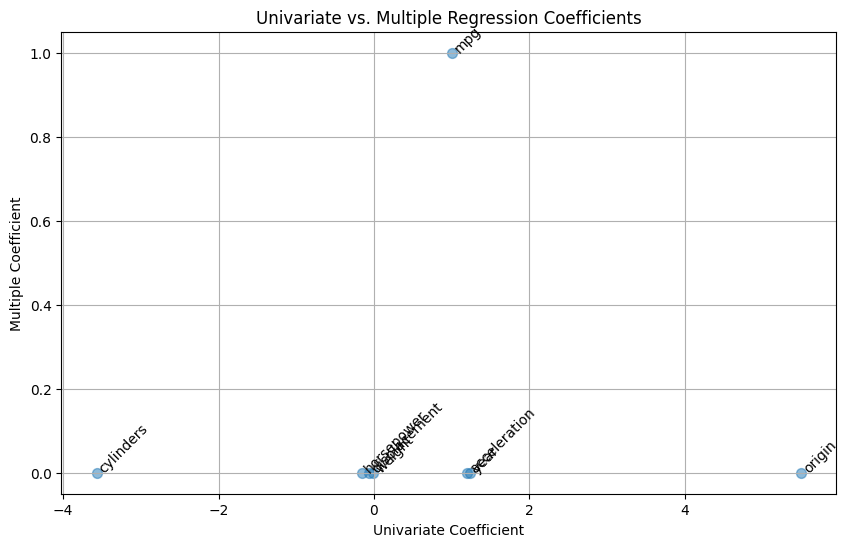

In [130]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize and fit individual univariate regression models
univariate_coefficients = {}
for predictor in auto_df.columns:
    model = LinearRegression()
    model.fit(auto_df[[predictor]], auto_df['mpg'])
    univariate_coefficients[predictor] = model.coef_[0]

# Initialize and fit the multiple regression model
multiple_model = LinearRegression()
multiple_model.fit(auto_df, auto_df['mpg'])
multiple_coefficients = multiple_model.coef_

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Univariate_Coefficient': list(univariate_coefficients.values()),
    'Multiple_Coefficient': multiple_coefficients
}, index=list(univariate_coefficients.keys()))

# Define the size of the points and the font size for labels
point_size = 50  # You can adjust this value as needed
label_fontsize = 10  # Adjust the font size as needed

# Create a scatter plot with bigger points
plt.figure(figsize=(10, 6))
plt.scatter(coefficients_df['Univariate_Coefficient'], coefficients_df['Multiple_Coefficient'], s=point_size, alpha=0.5)
plt.xlabel("Univariate Coefficient")
plt.ylabel("Multiple Coefficient")
plt.title("Univariate vs. Multiple Regression Coefficients")
plt.grid(True)

# Add labels for each point with 90-degree rotation and smaller font size
for i, txt in enumerate(coefficients_df.index):
    plt.annotate(txt, (coefficients_df['Univariate_Coefficient'][i], coefficients_df['Multiple_Coefficient'][i]),
                 rotation=45, fontsize=label_fontsize)

plt.show()


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create a list of predictor column names
predictor_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Define the degree of the polynomial basis functions
degree = 2  # You can adjust this degree as needed

# Initialize a dictionary to store coefficients for each predictor
coefficients_dict = {}

# Loop through each predictor column
for predictor_column in predictor_columns:
    # Select the predictor and response variable
    X = auto_df[[predictor_column]]
    y = auto_df['mpg']

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit a linear regression model to the transformed data
    model = LinearRegression()
    model.fit(X_poly, y)

    # Get the coefficients of the polynomial terms
    coefficients = model.coef_

    # The first coefficient corresponds to the intercept (constant) term
    intercept = model.intercept_

    # Store the coefficients and intercept in the dictionary
    coefficients_dict[predictor_column] = {
        'Coefficients': coefficients,
        'Intercept': intercept
    }

    # Print the coefficients for the current predictor
    print(f"Predictor: {predictor_column}")
    print("Coefficients of the polynomial terms:")
    print(coefficients)
    print(f"Intercept (Constant) Term: {intercept}")
    print("\n")

# Now, coefficients_dict contains coefficients for each predictor
# You can access them like coefficients_dict['cylinders']['Coefficients'] for 'cylinders'


Predictor: cylinders
Coefficients of the polynomial terms:
[ 0.         -6.43630055  0.24285407]
Intercept (Constant) Term: 50.71091101184853


Predictor: displacement
Coefficients of the polynomial terms:
[ 0.         -0.13929922  0.00017117]
Intercept (Constant) Term: 42.203511957223554


Predictor: horsepower
Coefficients of the polynomial terms:
[ 0.         -0.45577787  0.00118899]
Intercept (Constant) Term: 56.41935479857721


Predictor: weight
Coefficients of the polynomial terms:
[ 0.00000000e+00 -1.86740401e-02  1.72144677e-06]
Intercept (Constant) Term: 62.56076953536227


Predictor: acceleration
Coefficients of the polynomial terms:
[ 0.          3.88808335 -0.08426461]
Intercept (Constant) Term: -15.939970680447736


Predictor: year
Coefficients of the polynomial terms:
[  0.         -15.84090078   0.11230141]
Intercept (Constant) Term: 577.2522975023726


Predictor: origin
Coefficients of the polynomial terms:
[ 0.         15.71032943 -2.63022502]
Intercept (Constant) Term

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X 

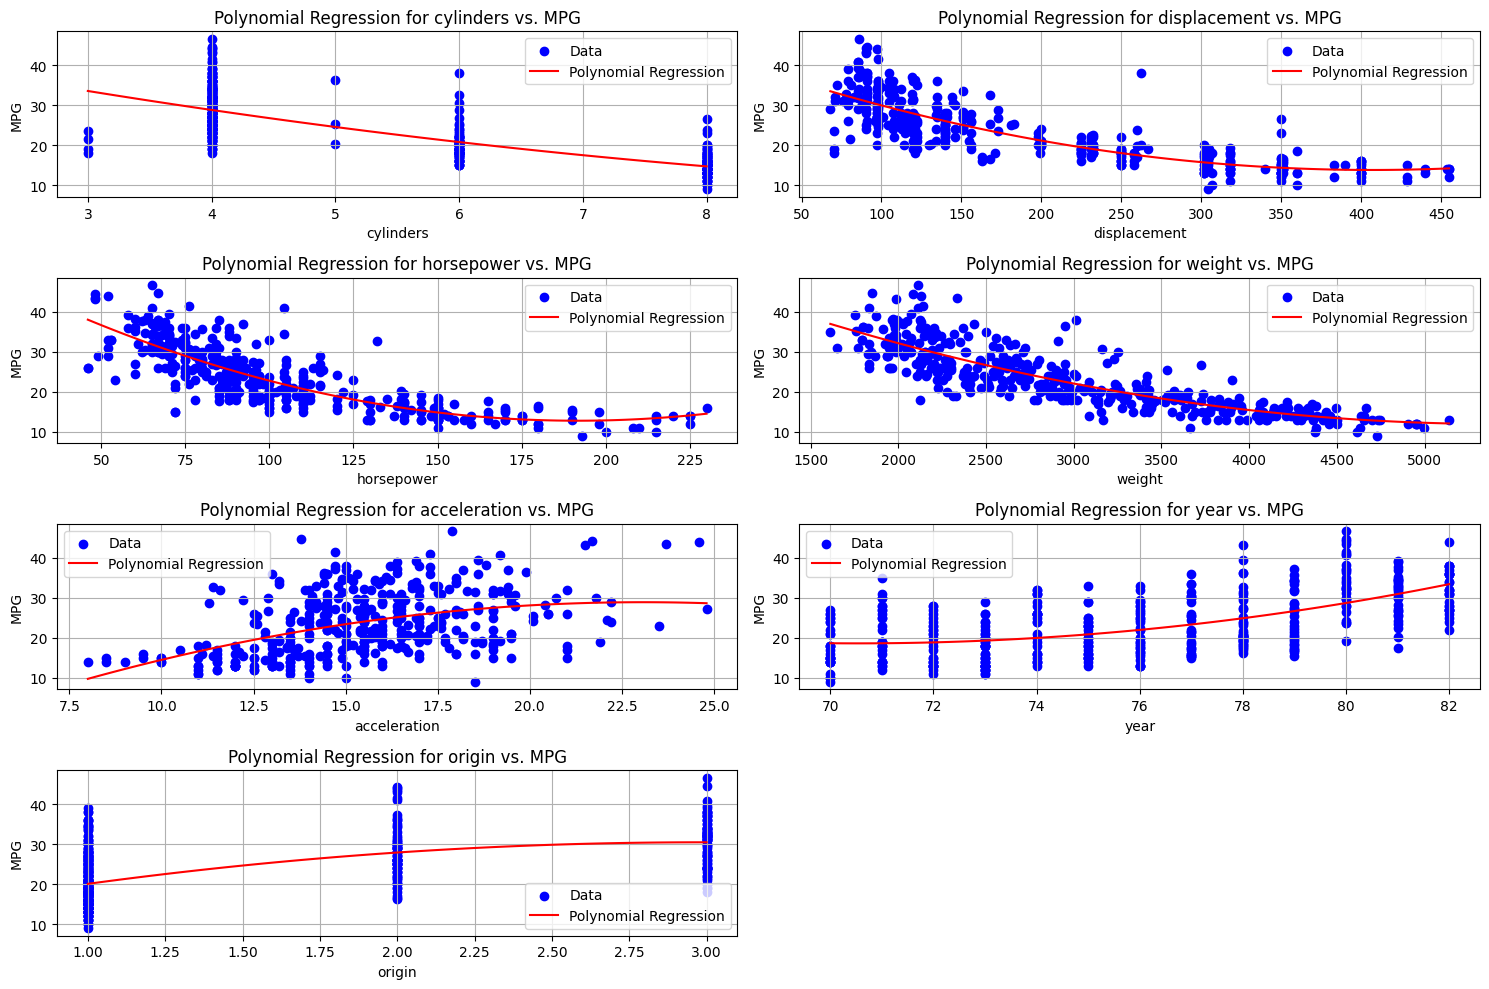

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create a list of predictor column names
predictor_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Define the degree of the polynomial basis functions
degree = 2  # You can adjust this degree as needed

# Calculate the number of rows and columns for subplots
n_predictors = len(predictor_columns)
n_cols = 2  # You can change the number of columns as needed
n_rows = (n_predictors + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Loop through each predictor column
for i, predictor_column in enumerate(predictor_columns):
    # Select the predictor and response variable
    X = auto_df[[predictor_column]]
    y = auto_df['mpg']

    # Create polynomial features without including bias
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Fit a linear regression model to the transformed data
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate points for the polynomial curve
    X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_curve_poly = poly.transform(X_curve)
    y_curve = model.predict(X_curve_poly)

    # Plot the data points
    ax = axes[i // n_cols, i % n_cols]
    ax.scatter(X, y, label='Data', color='blue')

    # Plot the polynomial regression curve
    ax.plot(X_curve, y_curve, label='Polynomial Regression', color='red')

    ax.set_xlabel(predictor_column)
    ax.set_ylabel("MPG")
    ax.set_title(f"Polynomial Regression for {predictor_column} vs. MPG")
    ax.legend()
    ax.grid(True)

# If there are empty subplots, remove them
for i in range(n_predictors, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()
